In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from google.colab import drive, files # google colab specific
import requests
import pandas as pd
import os
import warnings
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from keras import layers
import math
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime as dt
from pylab import rcParams

In [3]:
# Read in all Fundamental Data and Store it in one big dataframe for easier use
#df1 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/FedFundsRate.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Global Price Index of All Commodities.csv')
#df3 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/InflationRate 20y.csv')
#df4 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/All Employees Construction in Florida.csv')
#df5 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Homeownership Rate.csv')
#df6 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Housing Inventory Estimate Vacant Housing Units.csv')
#df7 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/MonthlySupplyHousesUSA.csv')
#df8 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Completed Total Units.csv')
#df9 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Under Construction Total Units.csv')
#df10 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Rental Vacancy Rate.csv')
#df11 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/State Tax Collections Total Taxes for Florida.csv')
#df12 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Total Shipments of New Manufactured Homes Total Homes.csv')
#df13 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/UnemploymentRate.csv')
#df14 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/ShillerIndex.csv')


In [ ]:
# Modify CSV files to fit each other
#filePath = "/content/drive/MyDrive/JPM/jphomevalue/data/TPXRSA.csv"
#df = pd.read_csv(filePath, header = 0)
#df['DATE'] = pd.to_datetime(df['DATE'])
#df = df.set_index('DATE')
#df.index = df.index.to_period("1M")
#df = df.resample('1M').interpolate()
#df = df.rename(columns={"TPXRSA": "ShillerIndex"})
#df

In [ ]:
# Download the new modified file 
#df.to_csv('RealEstateFundamentalData.csv')
#files.download('RealEstateFundamentalData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Join all datasets together
#df = df1.set_index('DATE').join(df2.set_index('DATE'), on='DATE').join(df3.set_index('DATE'), on='DATE').join(df4.set_index('DATE'), on='DATE').join(df5.set_index('DATE'), on='DATE').join(df6.set_index('DATE'), on='DATE').join(df7.set_index('DATE'), on='DATE').join(df8.set_index('DATE'), on='DATE').join(df9.set_index('DATE'), on='DATE').join(df10.set_index('DATE'), on='DATE').join(df11.set_index('DATE'), on='DATE').join(df12.set_index('DATE'), on='DATE').join(df13.set_index('DATE'), on='DATE').join(df14.set_index('DATE'), on='DATE')

In [421]:
# Read in the csv file that contains the time series data of the Shiller Index
# Create the dataframe

df = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/RealEstateFundamentalData2005-.csv')
df.head()

,DATE,FedRate,CommoditiesGlobalPrice,InflationRate,AllEmployeesConstructionFL,HomeownershipRate,VacantHousingInventory,MonthlyHouseSupply,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
0,2004-07,1.26,80.425518,2.80,574.6,69.000000,15656.00000,4.5,1881,1247,10.100000,7983.000000,129,5.5,159.950268
1,2004-08,1.43,81.693371,2.84,578.2,69.066667,15557.66667,4.3,1911,1238,10.066667,8010.333333,127,5.4,162.578638
2,2004-09,1.61,82.961225,2.73,577.6,69.133333,15459.33333,4.1,1796,1247,10.033333,8037.666667,134,5.4,165.082920
3,2004-10,1.76,84.229079,2.72,590.4,69.200000,15361.00000,3.9,1839,1264,10.000000,8065.000000,136,5.5,167.959498
4,2004-11,1.93,85.862922,2.80,596.0,69.166667,15490.00000,4.3,1758,1268,10.033333,8509.666667,135,5.4,170.588157


In [422]:
# Select Features
features = list(df)[1:15]

# Extract dates (For vizualization purposes)
datelist_total = list(df['DATE'])
datelist_total = [dt.datetime.strptime(date, '%Y-%m').date() for date in datelist_total]
print('Training set shape == {}'.format(df.shape))
print('All timestamps == {}'.format(len(datelist_total)))
print('Featured selected: {}'.format(features))

Training set shape == (208, 15)
All timestamps == 208
Featured selected: ['FedRate', 'CommoditiesGlobalPrice', 'InflationRate', 'AllEmployeesConstructionFL', 'HomeownershipRate', 'VacantHousingInventory', 'MonthlyHouseSupply', 'NewCompletedHousing', 'NewUnderConstrHousing', 'RentalVacancyRate', 'Taxes', 'ManufacturedHomesShipments', 'UnemploymentRate', 'ShillerIndex']


In [423]:
# Data Pre-Processing (CSV to NUMPY array)

df = df[features].astype(str)
for i in features:
    for j in range(0, len(df)):
        df[i][j] = df[i][j].replace(',', '')

df = df.astype(float)

# Using multiple features (predictors)
training_set = df.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set



Shape of training set == (208, 14).


array([[1.26000000e+00, 8.04255179e+01, 2.80000000e+00, ...,
        1.29000000e+02, 5.50000000e+00, 1.59950268e+02],
       [1.43000000e+00, 8.16933715e+01, 2.84000000e+00, ...,
        1.27000000e+02, 5.40000000e+00, 1.62578638e+02],
       [1.61000000e+00, 8.29612250e+01, 2.73000000e+00, ...,
        1.34000000e+02, 5.40000000e+00, 1.65082920e+02],
       ...,
       [9.00000000e-02, 1.74254761e+02, 2.39000000e+00, ...,
        1.05000000e+02, 5.20000000e+00, 2.96829882e+02],
       [8.00000000e-02, 1.80987905e+02, 2.38000000e+00, ...,
        1.06000000e+02, 4.70000000e+00, 3.04124715e+02],
       [8.00000000e-02, 1.87721050e+02, 2.54000000e+00, ...,
        1.07000000e+02, 4.60000000e+00, 3.09713391e+02]])

In [ ]:
# Visualize the data for reference. 
plt.plot(df)

In [101]:
#### NORMALIZATION #####
# Normalize the data with the range 0 - 1
#scaler = MinMaxScaler(feature_range=(0,1))

# Apply the scaler to the dataframe
#df = scaler.fit_transform(np.array(df).reshape(-1,1))

# Print df1 to check the change
#print(df1)

#### STANDARDIZATION ####

# Standardization for Training Set
scaler2 = StandardScaler()
training_set_X = scaler2.fit_transform(training_set)

# Standardization for Predicted Values
scaler_pred = StandardScaler()
training_set_Y = scaler_pred.fit_transform(training_set[:,13:14])


In [120]:
# Verify that standardization has been applied correctly by checking that mean is 0 and std is 1.
new_sequence = training_set_X[:,13].flatten()
new_sequence = new_sequence[new_sequence != 0] #ignore 0s
new_mean = new_sequence.mean()
new_std = new_sequence.std()
print("New mean is:", new_mean)
print("new_std is:", new_std)

New mean is: 1.0248212535001446e-16
new_std is: 1.0


In [127]:
#print(scaler2.inverse_transform(training_set_X))
df.shape

(208, 14)

In [234]:
# Create matrix
data_X, data_Y = [], []
time_step = 24
dataset = training_set_X

for i in range(len(dataset)-time_step-1):
  k = dataset[i:(i + time_step), 0:df.shape[1] - 1]
  data_X.append(k)
  data_Y.append(dataset[i + time_step-1:i+time_step, 13])
  
data_X, data_Y = np.array(data_X), np.array(data_Y)


In [328]:
# Split the data in training, validation and test set. 
data_split = {'train': 0.7, 'valid': 0.15, 'test': 0.15}
data_partition = {
      'trainX': data_X[0:int((data_split['train'])*data_X.shape[0])],
      'validationX': data_X[int(data_split['train']*data_X.shape[0]):int((1-data_split['test'])*data_X.shape[0])],
      'testX' : data_X[int((1-data_split['test'])*data_X.shape[0]):,],
      'trainY': data_Y[0:int((data_split['train'])*data_X.shape[0])],
      'validationY': data_Y[int(data_split['train']*data_X.shape[0]):int((1-data_split['test'])*data_X.shape[0])],
      'testY' : data_Y[int((1-data_split['test'])*data_X.shape[0]):data_X.shape[0]]
}



# Populate the data partitions 
x_train = data_partition['trainX']
y_train = data_partition['trainY']

x_valid = data_partition['validationX']
y_valid = data_partition['validationY']

x_test = data_partition['testX']
y_test = data_partition['testY']



In [247]:
# Hyperparameters
batch_size = 128
epochs = 500
learning_rate = 0.01

In [248]:
# LSTM MODEL ARCHITECTURE

model = keras.models.Sequential([
  keras.Input(shape=(24, 13)),
  # 4 LSTM Layers 
  keras.layers.GRU(units=500, return_sequences=True),
  keras.layers.GRU(units=500, return_sequences=True),
  keras.layers.GRU(units=500, return_sequences=True),
  keras.layers.GRU(units=500),
  keras.layers.Dropout(0.5),
  # Fully Connected Layer
  keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 24, 500)           772500    
                                                                 
 gru_9 (GRU)                 (None, 24, 500)           1503000   
                                                                 
 gru_10 (GRU)                (None, 24, 500)           1503000   
                                                                 
 gru_11 (GRU)                (None, 500)               1503000   
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 5,282,001
Trainable params: 5,282,001
No

In [249]:
# Loss and Optimizer Functions
mse = tf.keras.losses.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=mse, optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=[rmse])

In [250]:
# Callbacks.

callbacks = [EarlyStopping(monitor='val_loss', patience=100, verbose=1), 
            ModelCheckpoint(filepath='/content/sample_data/lstm-model-fundamental-24-14-1.h5', verbose=1, monitor='val_loss', save_best_only=True, save_weights_only=False)]

# Train the model
history = model.fit(x=x_train, y=y_train, validation_data =(x_valid, y_valid), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=callbacks)


Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 4.8960 - root_mean_squared_error: 2.2127 
Epoch 1: val_loss improved from inf to 212.50450, saving model to /content/sample_data/lstm-model-fundamental-24-14-1.h5
2/2 [==============================] - 14s 3s/step - loss: 4.8960 - root_mean_squared_error: 2.2127 - val_loss: 212.5045 - val_root_mean_squared_error: 14.5775
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 241.4075 - root_mean_squared_error: 15.5373
Epoch 2: val_loss improved from 212.50450 to 3.84879, saving model to /content/sample_data/lstm-model-fundamental-24-14-1.h5
2/2 [==============================] - 4s 1s/step - loss: 241.4075 - root_mean_squared_error: 15.5373 - val_loss: 3.8488 - val_root_mean_squared_error: 1.9618
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 6.8604 - root_mean_squared_error: 2.6192
Epoch 3: val_loss did not improve from 3.84879
2/2 [==============================] - 3s 974ms/step - loss:

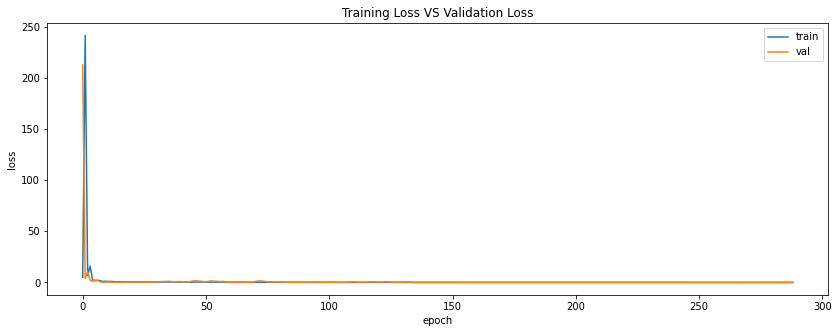

In [251]:
# Visualize loss

# Visualize training and validation loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss VS Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [424]:
# Generate list of sequence of days for predictions

n_future_step = 12
n_train_step = int(0.7 * 208)
n_val_step = int(0.15 * 208)
n_test_step = int(0.15 * 208)


datelist_train = pd.date_range(datelist_total[24], periods = n_train_step-17, freq='1m').tolist()
datelist_val = pd.date_range(datelist_total[n_train_step+24], periods=n_val_step-4, freq='1m').tolist()
datelist_test =pd.date_range(datelist_total[len(datelist_total)-n_test_step+17], periods=n_test_step-20, freq='1m').tolist()

datelist_future = pd.date_range(datelist_total[-1], periods=n_future_step, freq='1m').tolist()
# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
datelist_train_ = []
datelist_val_ = []
datelist_test_ = []

for this_timestamp in datelist_train:
    datelist_future_.append(this_timestamp.date())
for this_timestamp in datelist_val:
    datelist_train_.append(this_timestamp.date())
for this_timestamp in datelist_test:
    datelist_val_.append(this_timestamp.date())
for this_timestamp in datelist_future:
    datelist_test_.append(this_timestamp.date())


In [416]:
PREDICTIONS_TEST_SET['ShillerIndex']

2019-04-30    210.037506
2019-05-31    197.758835
2019-06-30    204.932877
2019-07-31    214.569214
2019-08-31    213.555237
2019-09-30    215.550903
2019-10-31    213.026001
2019-11-30    212.700836
2019-12-31    216.063873
2020-01-31    214.682281
2020-02-29    212.331573
2020-03-31    213.540359
2020-04-30    208.137894
2020-05-31    204.638596
2020-06-30    206.224960
2020-07-31    207.459717
2020-08-31    204.424500
2020-09-30    206.529572
2020-10-31    198.254196
2020-11-30    199.462601
2020-12-31    201.238815
2021-01-31    202.174957
2021-02-28    200.366455
2021-03-31    197.929214
2021-04-30    199.474915
2021-05-31    199.228088
2021-06-30    199.175262
2021-07-31    200.106934
Name: ShillerIndex, dtype: float32

In [255]:
# Perform predictions
predictions_future = model.predict(x_train[-12:])
train_set_prediction = model.predict(x_train) 
val_set_prediction = model.predict(x_valid)
test_set_prediction = model.predict(x_test)

In [347]:
#print(scaler_pred.inverse_transform(test_set_prediction))
#print(scaler_pred.inverse_transform(y_test))
#print(scaler_pred.inverse_transform(train_set_prediction))
#print(scaler_pred.inverse_transform(y_train))
x_train.shape

(128, 24, 13)

In [271]:
# Calculate RMSE
math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_train),scaler_pred.inverse_transform(train_set_prediction)))

3.1269830941419

In [ ]:
# Parse training set timestamp for better visualization
df = pd.DataFrame(df, columns=cols)
df.index = datelist_total
df.index = pd.to_datetime(df.index)

In [425]:
# Inversion and Tranformation

def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_train = scaler_pred.inverse_transform(train_set_prediction)
y_pred_valid = scaler_pred.inverse_transform(val_set_prediction)
y_pred_test = scaler_pred.inverse_transform(test_set_prediction)

y_pred_future = scaler_pred.inverse_transform(predictions_future)
#y_pred_train = scaler_pred.inverse_transform(predictions_train)


PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['ShillerIndex']).set_index(pd.Series(datelist_future))
PREDICTIONS_TRAIN_SET = pd.DataFrame(y_pred_train, columns=['ShillerIndex']).set_index(pd.Series(datelist_train))
PREDICTIONS_VAL_SET = pd.DataFrame(y_pred_valid, columns=['ShillerIndex']).set_index(pd.Series(datelist_val))
PREDICTIONS_TEST_SET = pd.DataFrame(y_pred_test, columns=['ShillerIndex']).set_index(pd.Series(datelist_test))


# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTIONS_TRAIN_SET.index = PREDICTIONS_TRAIN_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_VAL_SET.index = PREDICTIONS_VAL_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_TEST_SET.index = PREDICTIONS_TEST_SET.index.to_series().apply(datetime_to_timestamp)


ValueError: ignored

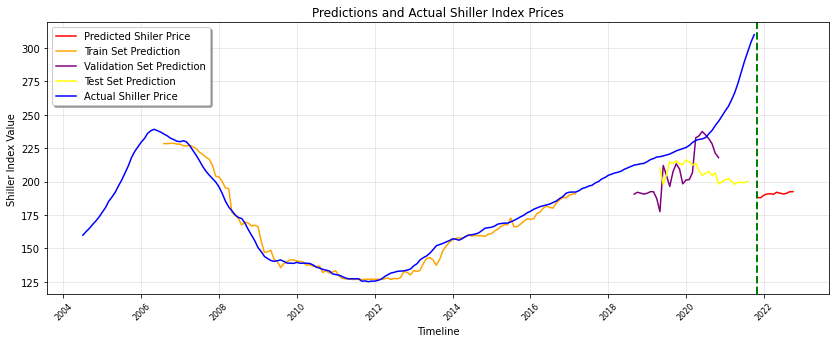

In [410]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE = '2004-01'
START_DATE_TRAIN = '2004-07-31'
START_DATE_VAL = '2016-08-31'
START_DATE_TEST = '2019-04-30'
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['ShillerIndex'], color='r', label='Predicted Shiler Price')
plt.plot(PREDICTIONS_TRAIN_SET.index, PREDICTIONS_TRAIN_SET['ShillerIndex'], color='orange', label='Train Set Prediction')
plt.plot(PREDICTIONS_VAL_SET.index, PREDICTIONS_VAL_SET['ShillerIndex'], color='purple', label='Validation Set Prediction')
plt.plot(PREDICTIONS_TEST_SET.index, PREDICTIONS_TEST_SET[START_DATE_TEST:]['ShillerIndex'], color='yellow', label='Test Set Prediction')
plt.plot(df.loc[START_DATE:].index, df.loc[START_DATE:]['ShillerIndex'], color='b', label='Actual Shiller Price')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predictions and Actual Shiller Index Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Shiller Index Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [394]:
df

,FedRate,CommoditiesGlobalPrice,InflationRate,AllEmployeesConstructionFL,HomeownershipRate,VacantHousingInventory,MonthlyHouseSupply,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
2004-07-01,1.26,80.425518,2.80,574.6,69.000000,15656.00000,4.5,1881,1247,10.100000,7983.000000,129,5.5,159.950268
2004-08-01,1.43,81.693371,2.84,578.2,69.066667,15557.66667,4.3,1911,1238,10.066667,8010.333333,127,5.4,162.578638
2004-09-01,1.61,82.961225,2.73,577.6,69.133333,15459.33333,4.1,1796,1247,10.033333,8037.666667,134,5.4,165.082920
2004-10-01,1.76,84.229079,2.72,590.4,69.200000,15361.00000,3.9,1839,1264,10.000000,8065.000000,136,5.5,167.959498
2004-11-01,1.93,85.862922,2.80,596.0,69.166667,15490.00000,4.3,1758,1268,10.033333,8509.666667,135,5.4,170.588157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,0.08,163.062699,2.43,573.0,65.400000,15336.33333,6.1,1312,1371,5.933333,14133.000000,106,5.9,281.680957
2021-07-01,0.10,167.521616,2.39,576.7,65.400000,15185.00000,6.2,1380,1384,5.800000,13715.000000,104,5.4,289.633330
2021-08-01,0.09,174.254761,2.39,575.0,65.433333,15115.00000,6.8,1291,1408,5.733333,13863.666670,105,5.2,296.829882
2021-09-01,0.08,180.987905,2.38,576.6,65.466667,15045.00000,6.3,1235,1434,5.666667,14012.333330,106,4.7,304.124715
